In [21]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_excel('Default.xlsx', sheetname='Sheet1')
 
print("Column headings:")
print(df.columns)
df("default").value_counts()

/home/allen/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Column headings:
Index(['default', 'student', 'balance', 'income'], dtype='object')


TypeError: 'DataFrame' object is not callable

In [23]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

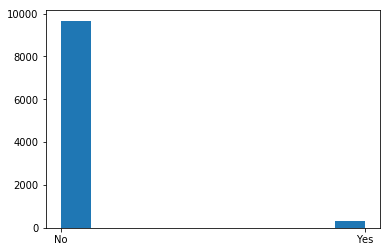

In [24]:
plt.hist(df["default"])
plt.show()

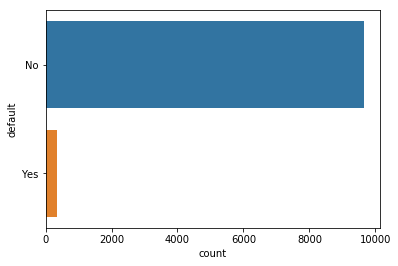

In [25]:
sb.countplot(y="default",data = df)
plt.show()

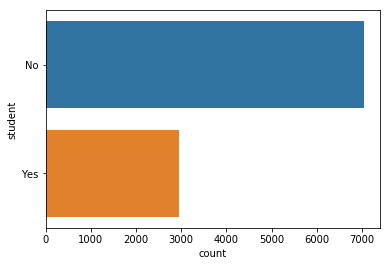

In [26]:
sb.countplot(y="student",data = df)
plt.show()

In [27]:
df1 = df[df.default != 'No']

In [38]:
#df2 = pd.get_dummies(df['default'])
#df2
#df4 = pd.concat([df,df2], axis =1)
#df4 = df4.drop(['default'], axis =1)
#df4 = df4.rename(columns={'No': 'Default-No', 'Yes':'Default-Yes'})
df5 = pd.get_dummies(df['student'])
df5
df4 = pd.concat([df,df5], axis =1)
df4 = df4.drop(['student'], axis =1)
df4 = df4.rename(columns={'No': 'Student-No', 'Yes':'Student-Yes'})
df4

,default,balance,income,Student-No,Student-Yes
1,No,729.526495,44361.625074,1,0
2,No,817.180407,12106.134700,0,1
3,No,1073.549164,31767.138947,1,0
4,No,529.250605,35704.493935,1,0
5,No,785.655883,38463.495879,1,0
6,No,919.588530,7491.558572,0,1
7,No,825.513331,24905.226578,1,0
8,No,808.667504,17600.451344,0,1
9,No,1161.057854,37468.529288,1,0
10,No,0.000000,29275.268293,1,0


In [40]:
y = df4["default"]
y = y.rename({'No': '0', 'Yes':'1'})
y

1         No
2         No
3         No
4         No
5         No
6         No
7         No
8         No
9         No
10        No
11        No
12        No
13        No
14        No
15        No
16        No
17        No
18        No
19        No
20        No
21        No
22        No
23        No
24        No
25        No
26        No
27        No
28        No
29        No
30        No
        ... 
9971      No
9972      No
9973      No
9974      No
9975      No
9976      No
9977      No
9978      No
9979     Yes
9980      No
9981      No
9982      No
9983      No
9984      No
9985      No
9986      No
9987      No
9988      No
9989      No
9990      No
9991      No
9992      No
9993      No
9994      No
9995      No
9996      No
9997      No
9998      No
9999      No
10000     No
Name: default, Length: 10000, dtype: object

In [30]:
df4 = df4.drop("default", axis =1)
x_train,x_test,y_train,y_test = train_test_split(df4,y,test_size = 0.3)
df4

,balance,income,Student-No,Student-Yes
1,729.526495,44361.625074,1,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,1,0
4,529.250605,35704.493935,1,0
5,785.655883,38463.495879,1,0
6,919.588530,7491.558572,0,1
7,825.513331,24905.226578,1,0
8,808.667504,17600.451344,0,1
9,1161.057854,37468.529288,1,0
10,0.000000,29275.268293,1,0


In [31]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = classifier.predict(x_test)

# Remember: Logistic Regression predicts probability of class, not actual class
y_pred_prob = classifier.predict_proba(x_test)

In [33]:
print(y_pred_prob[:5])
print(y_pred[:5])

[[0.99739741 0.00260259]
 [0.67451187 0.32548813]
 [0.89195241 0.10804759]
 [0.94668933 0.05331067]
 [0.97952691 0.02047309]]
['No' 'No' 'No' 'No' 'No']


In [34]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_test,y_pred)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[2897    1]
 [ 102    0]]

TN = 2897
FN = 1
FP = 102
TP = 0


In [35]:
accuracy = (confuse[0][0] + confuse[1][1])/ len(y_test)
print("accuracy is:",accuracy)
precision =  confuse[1][1]/(confuse[1][1]+confuse[0][1])
print("precision:",precision)
recall = confuse[1][1]/(confuse[1][1]+confuse[1][0])
print("recall:",recall)

accuracy is: 0.9656666666666667
precision: 0.0
recall: 0.0
